In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from pycoingecko import CoinGeckoAPI
import requests


In [19]:


# Setting aesthetics for plotting
plt.style.use('fivethirtyeight')

def get_current_data():
    # URL for CoinGecko API to get current data for all cryptocurrencies
    url = "https://api.coingecko.com/api/v3/coins/markets"
    
    # Parameters for the API request
    params = {
        'vs_currency': 'usd',  # Convert prices to USD
        'order': 'market_cap_desc',  # Order by market capitalization in descending order
        'per_page': 10  # Number of cryptocurrencies to retrieve
    }
    
    # Send GET request to the API
    response = requests.get(url, params=params)
    data = response.json()
    
    # Create a DataFrame from the response data
    current_data = pd.DataFrame(data, columns=['id', 'symbol', 'name', 'current_price', 'market_cap', 'market_cap_rank'])
    
    return current_data

# Get current data
current = get_current_data()

# Printing out the first few lines
print(current.head())

            id symbol      name  current_price    market_cap  market_cap_rank
0      bitcoin    btc   Bitcoin   28626.000000  557054772600                1
1     ethereum    eth  Ethereum    1796.860000  215883157683                2
2       tether   usdt    Tether       0.998901   82949712323                3
3  binancecoin    bnb       BNB     230.810000   35514397374                4
4       ripple    xrp       XRP       0.591271   31227480055                5


In [20]:
current

,id,symbol,name,current_price,market_cap,market_cap_rank
0,bitcoin,btc,Bitcoin,28626.000000,557054772600,1
1,ethereum,eth,Ethereum,1796.860000,215883157683,2
2,tether,usdt,Tether,0.998901,82949712323,3
3,binancecoin,bnb,BNB,230.810000,35514397374,4
4,ripple,xrp,XRP,0.591271,31227480055,5
5,usd-coin,usdc,USD Coin,1.000000,26071313257,6
6,staked-ether,steth,Lido Staked Ether,1794.770000,14631793980,7
7,cardano,ada,Cardano,0.276925,9688024345,8
8,dogecoin,doge,Dogecoin,0.068110,9567165714,9
9,solana,sol,Solana,23.270000,9477632651,10


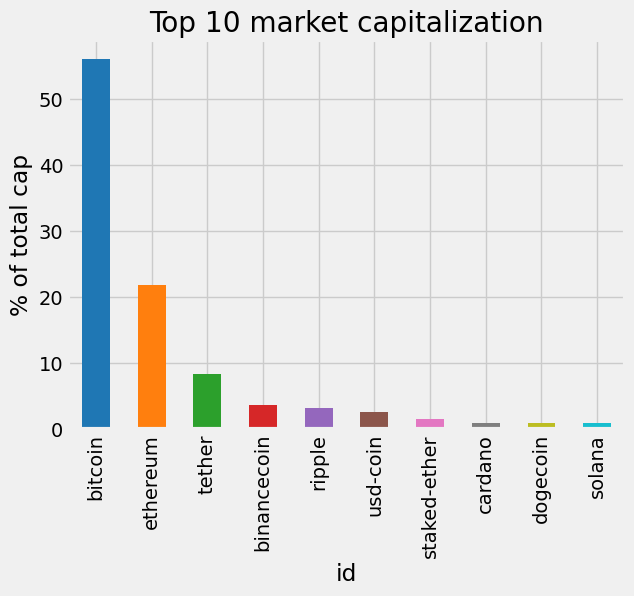

In [23]:
# Declare constants for later use
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Select the top 10 cryptocurrencies by market cap and calculate market_cap_perc
cap10 = current.sort_values('market_cap', ascending=False).set_index('id').head(10)
total_market_cap = cap10['market_cap'].sum()
cap10['market_cap_perc'] = cap10['market_cap'] / total_market_cap * 100

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting the barplot with custom colors
ax = cap10['market_cap_perc'].plot.bar(title=TOP_CAP_TITLE, color=colors)

# Annotating the y axis
ax.set_ylabel(TOP_CAP_YLABEL)

# Display the plot
plt.show()





In [26]:
# Selecting the id and percent_change_24h columns
volatility = current.loc[:, ['id', 'percent_change_24h']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h', ascending=True)

# Display the first few rows
print(volatility.head())



          percent_change_24h
id                          
cardano           -99.984570
tether            -99.944409
ripple            -99.743828
ethereum          -93.722979
dogecoin          -75.404893


In [29]:
volatility.columns

Index(['percent_change_24h'], dtype='object')